## 1. Importing Libraries

In [7]:
import torch 
from torch import nn
from torch import optim
from torch.nn import functional as f

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchinfo import summary

import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from PIL import Image

import os
from sklearn.model_selection import train_test_split


In [8]:
##################### defining hyperparameters #####################
lr = 0.001
batch_size = 16
epochs = 50

In [20]:
# Load train and test data

train_dir = './dataset/train/'
test_dir = "./dataset/test/"

from glob import glob

train_list = glob(os.path.join(train_dir, "**/*.jpg"))
test_list = glob(os.path.join(test_dir, "*.jpg"))

print("no of images in training")

In [ ]:
################### model ###################

IndexError: list index out of range

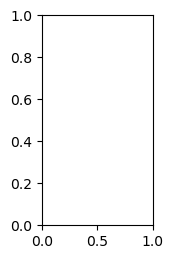

In [19]:
############### plot random images ################

random_idx = np.random.randint(1,250, size = 10)

fig = plt.figure(figsize= (10,6))
i = 1
for idx in random_idx:
    ax = fig.add_subplot(2,6,i)
    img = Image.open(train_list[idx])
    plt.imshow(img)
    i +=1

plt.axis("off")
plt.show()